In [1]:
import tensorflow as tf

from tensorflow.keras import models
from tensorflow.keras import layers

import random
import numpy as np

# For viewing the Tensor Graph. 

from tensorflow.python.summary.writer.writer import FileWriter
from matplotlib import pyplot

In [2]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [3]:
# To view the tensorgraph, we use the TensorBoard. 

%load_ext tensorboard

In [4]:
pip list | grep tensorflow

tensorflow                         2.5.0
tensorflow-estimator               2.5.0
Note: you may need to restart the kernel to use updated packages.


In [6]:
random.seed(42)         # Initialize the random number generator.
np.random.seed(42)      # With the seed reset, the same set of 
                        # numbers will appear every time. 
                        # sets the graph-level random seed

tf.set_random_seed(42)

In [7]:
# Use the MNIST dataset  of Keras.

mnistDataSetFromKeras = tf.keras.datasets.mnist

In [8]:
(Xtrain, Ytrain) , (Xtest, Ytest) = mnistDataSetFromKeras.load_data()

In [9]:
Xtrain.shape

(60000, 28, 28)

In [10]:
Ytrain.shape

(60000,)

In [11]:
Xtest.shape

(10000, 28, 28)

In [12]:
Ytest.shape

(10000,)

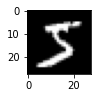

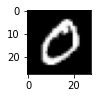

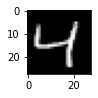

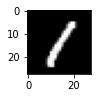

In [13]:
for i in range(4):
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(Xtrain[i], cmap=pyplot.get_cmap('gray'))
    pyplot.show()

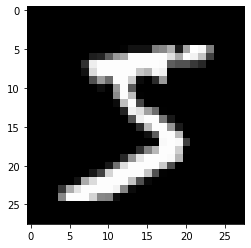

In [15]:
pyplot.imshow(Xtrain[0], cmap=pyplot.get_cmap('gray'))

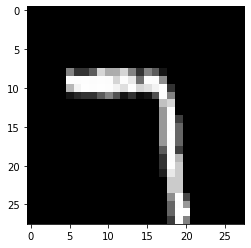

In [17]:
pyplot.imshow(Xtest[5999], cmap=pyplot.get_cmap('gray'))

In [18]:
Ytrain[59999]

8

In [19]:
Ytest[9999]

6

In [20]:
Xtrain[59999].shape

(28, 28)

In [21]:
Xtrain[59999,20]

array([  0,   0,   0,   0,   0,   0,  66, 209, 153,  19,  19, 233,  60,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0], dtype=uint8)

In [22]:
Xtrain.shape

(60000, 28, 28)

In [23]:
Xtrain[59999]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [24]:
# Normalize the data
# 60000 input images are in the Xtrain set.
# 10000 input images are in the Xtest set.

Xtrain = Xtrain.reshape(60000, 28*28)    # reshape the input set to size 28*28.

In [25]:
Xtrain.shape

(60000, 784)

In [26]:
Xtrain[59999]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [27]:
Xtrain[0].size

784

In [28]:
Xtrain[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [29]:
Xtrain = Xtrain.astype('float32')/255      # normalize to grayscale; set datatype as float32

In [30]:
Xtrain[59999].size

784

In [31]:
Xtrain[0].shape

(784,)

In [32]:
Xtest = Xtest.reshape((10000, 28*28))      # reshape the input set to size 28*28. 
Xtest = Xtest.astype('float32')/255        # normalize to grayscale; set datatype as float32

In [33]:
Xtest[0].size

784

In [34]:
Xtest[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [35]:
Ytrain[0]

5

In [36]:
Ytest[0]

7

In [37]:
Ytrain = tf.keras.utils.to_categorical(Ytrain)
Ytest = tf.keras.utils.to_categorical(Ytest)

In [38]:
Ytrain[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [39]:
Ytest[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [40]:
# Create a model object

dnnModel = models.Sequential()

In [41]:
# Layer 1 == input layer == Specify the input size in the first layer.

dnnModel.add(layers.Dense(50, activation='relu', input_shape=(784,)))

In [42]:
# Layer 2 = hidden layer 

dnnModel.add(layers.Dense(60, activation='relu'))

In [43]:
## Layer2 DropOut Factor 

dnnModel.add(layers.Dropout(0.5))

In [44]:
# Layer 3 = hidden layer 

dnnModel.add(layers.Dense(30, activation='relu'))

In [45]:
# Add dropout of 50% to layer 3

dnnModel.add(layers.Dropout(0.5))

In [46]:
# Layer 4 = output layer

dnnModel.add(layers.Dense(10, activation='softmax'))

In [47]:
dnnModel.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                39250     
_________________________________________________________________
dense_1 (Dense)              (None, 60)                3060      
_________________________________________________________________
dropout (Dropout)            (None, 60)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 30)                1830      
_________________________________________________________________
dropout_1 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                310       
Total params: 44,450
Trainable params: 44,450
Non-trainable params: 0
____________________________________________________

In [48]:
# Configure  the model for training, by using appropriate optimizers and regularizations
# Available optimizer: adam, rmsprop, adagrad, sgd
# loss:  objective that the model will try to minimize. 
# Available loss: categorical_crossentropy, binary_crossentropy, mean_squared_error
# metrics: List of metrics to be evaluated by the model during training and testing. 
        
dnnModel.compile( optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy'] )

In [49]:
# train the model

h = dnnModel.fit( Xtrain, Ytrain, validation_split=0.2, epochs=25, batch_size=64)

Train on 48000 samples, validate on 12000 samples
Epoch 1/25
46720/48000 [============================>.] - ETA: 0s - loss: 1.0108 - acc: 0.6612

/Users/B0218162/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:2426: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


48000/48000 [==============================] - 2s 34us/sample - loss: 0.9993 - acc: 0.6657 - val_loss: 0.2707 - val_acc: 0.9272
Epoch 2/25
48000/48000 [==============================] - 1s 20us/sample - loss: 0.4836 - acc: 0.8633 - val_loss: 0.1996 - val_acc: 0.9459
Epoch 3/25
48000/48000 [==============================] - 1s 18us/sample - loss: 0.3807 - acc: 0.8951 - val_loss: 0.1737 - val_acc: 0.9553
Epoch 4/25
48000/48000 [==============================] - 1s 17us/sample - loss: 0.3214 - acc: 0.9113 - val_loss: 0.1543 - val_acc: 0.9583
Epoch 5/25
48000/48000 [==============================] - 1s 17us/sample - loss: 0.2826 - acc: 0.9227 - val_loss: 0.1497 - val_acc: 0.9606
Epoch 6/25
48000/48000 [==============================] - 1s 17us/sample - loss: 0.2578 - acc: 0.9291 - val_loss: 0.1493 - val_acc: 0.9633
Epoch 7/25
48000/48000 [==============================] - 1s 18us/sample - loss: 0.2382 - acc: 0.9339 - val_loss: 0.1552 - val_acc: 0.9633
Epoch 8/25
48000/48000 [==============

In [50]:
print('Final training loss \t', h.history['loss'][-1])
print('Final training accuracy ', h.history['acc'][-1])

Final training loss 	 0.11941393529127041
Final training accuracy  0.964125


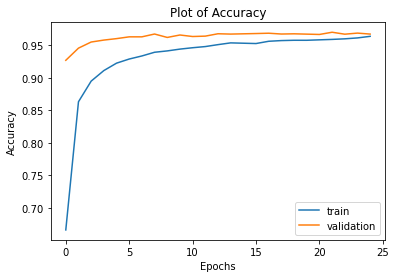

In [52]:
# plot the training  accuracy  
import matplotlib.pyplot as plt

plt.plot(h.history['acc'], label='train')
plt.plot(h.history['val_acc'], label='validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Plot of Accuracy')
plt.legend()
plt.show()

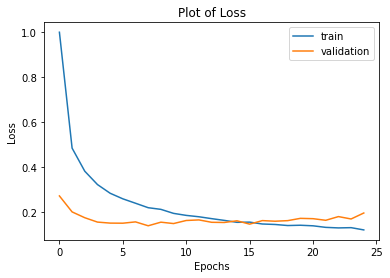

In [53]:
# plot the traininig loss 


plt.plot(h.history['loss'], label='train')
plt.plot(h.history['val_loss'], label='validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Plot of Loss')
plt.legend()
plt.show()

In [54]:
# testing the model

testLoss, testAccuracy = dnnModel.evaluate( Xtest, Ytest)

In [55]:
print('Testing loss \t', testLoss)
print('Testing accuracy ', testAccuracy)

Testing loss 	 0.1826384097844089
Testing accuracy  0.9686
